<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DIP Lab Assignment **9**
# N.Sai Karthik (AP21110010310) CSE-E



Take a low contrast grayscale image (A) and a
high contrast gray scale image (B). Write a program to improve the contrast of
A with the help of image B using histogram specification or matching. The
prototype of the function is as below: Histogram_sp(input_Image,
specified_Iage, no_of_bins); The function should return the enhanced image.

In [5]:
!pip install opencv-python-headless


Original Low Contrast Image:


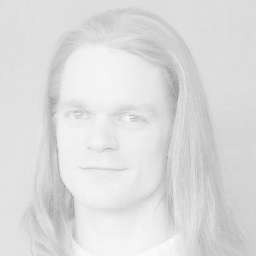

High Contrast Specified Image:


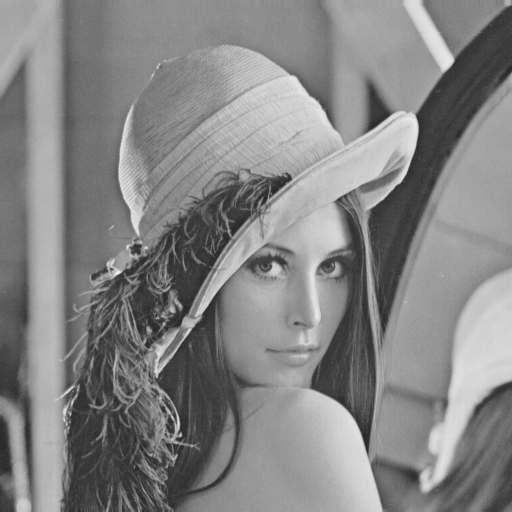

Enhanced Image:


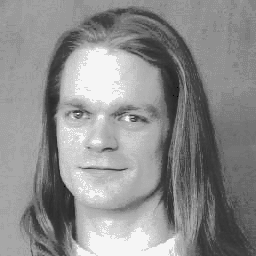

In [9]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def Histogram_sp(input_Image, specified_Image, no_of_bins=256):
    input_hist, input_bins = np.histogram(input_Image.flatten(), no_of_bins, [0, 256])
    input_cdf = input_hist.cumsum()
    input_cdf_normalized = input_cdf * (input_hist.max() / input_cdf.max())

    specified_hist, specified_bins = np.histogram(specified_Image.flatten(), no_of_bins, [0, 256])
    specified_cdf = specified_hist.cumsum()
    specified_cdf_normalized = specified_cdf * (specified_hist.max() / specified_cdf.max())

    mapping = np.zeros(256)
    for i in range(256):
        diff = np.abs(input_cdf_normalized[i] - specified_cdf_normalized)
        mapping[i] = np.argmin(diff)

    enhanced_image = mapping[input_Image]

    return enhanced_image.astype(np.uint8)

if __name__ == "__main__":
    input_Image = cv2.imread('/content/drive/MyDrive/DIP /Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png', 0)  # Load low contrast image
    specified_Image = cv2.imread('/content/drive/MyDrive/DIP /Lenna_(test_image).png', 0)  # Load high contrast image

    enhanced_image = Histogram_sp(input_Image, specified_Image)

    cv2.imwrite('enhanced_image.jpg', enhanced_image)

    print("Original Low Contrast Image:")
    cv2_imshow(input_Image)

    print("High Contrast Specified Image:")
    cv2_imshow(specified_Image)

    print("Enhanced Image:")
    cv2_imshow(enhanced_image)
